In [4]:
import pandas as pd
from urllib.parse import quote

# Original connection string components
user = 'chauanphu'
password = '258456C@p'  # Your password with special chars
host = '100.64.0.2'
port = '5432'
database = 'timmach_thuduc'

# URL-encode the password
encoded_password = quote(password)

# Build the connection string
connection_string = f'postgresql+pg8000://{user}:{encoded_password}@{host}:{port}/{database}'
query = """ SELECT * FROM analysis_views.xn;"""

df = pd.read_sql_query(query, connection_string)
df.head()

,id,idxetnghiem,maql,mavaovien,phai,tuoi,id_bv_ten,ten_bv_ten,id_bv_so,ten_bv_so,...,cannang,chieucao,huyetap,mach,nhietdo,maxn,maicd,chandoan,loaibenhan,mabn
0,198,200318063304998868,200311102400887962,200311072003827694,1,70,330,"Điện giải đồ (Na, K,CL)",3,HÓA SINH,...,61.0,160.0,110/73,93.0,37.0,S10,I50,Suy tim,NOITRU,20115670
1,199,200311123553811300,200311102400887962,200311072003827694,1,70,547,FT4,6,MIỄN DỊCH,...,61.0,160.0,110/73,93.0,37.0,S45,I50,Suy tim,NOITRU,20115670
2,200,200316121132173807,200311102400887962,200311072003827694,1,70,91,"Thời gian Prothombin (PT%, PTs, INR) (tỷ lệ Pr...",2,HUYẾT HỌC,...,61.0,160.0,110/73,93.0,37.0,PRO007,I50,Suy tim,NOITRU,20115670
3,201,200316121132173807,200311102400887962,200311072003827694,1,70,180,HBsAg (nhanh),1,VI SINH,...,61.0,160.0,110/73,93.0,37.0,H176,I50,Suy tim,NOITRU,20115670
4,202,200317112040527780,200311102400887962,200311072003827694,1,70,330,"Điện giải đồ (Na, K,CL)",3,HÓA SINH,...,61.0,160.0,110/73,93.0,37.0,S82,I50,Suy tim,NOITRU,20115670


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579434 entries, 0 to 579433
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           579434 non-null  int64  
 1   idxetnghiem  579434 non-null  object 
 2   maql         579434 non-null  object 
 3   mavaovien    579434 non-null  object 
 4   phai         579434 non-null  int64  
 5   tuoi         579434 non-null  int64  
 6   id_bv_ten    579434 non-null  object 
 7   ten_bv_ten   579434 non-null  object 
 8   id_bv_so     579434 non-null  object 
 9   ten_bv_so    579434 non-null  object 
 10  ddmmyyyy     579434 non-null  object 
 11  id_ten       579434 non-null  object 
 12  ma_ten       579434 non-null  object 
 13  tenxn        579434 non-null  object 
 14  ketqua       579434 non-null  object 
 15  cannang      373254 non-null  float64
 16  chieucao     373254 non-null  float64
 17  huyetap      237640 non-null  object 
 18  mach         373254 non-

In [25]:
import matplotlib.pyplot as plt
# Group by 'idcdha' and 'maicd', count occurrences
print("Number of unique maxn: ", df['maxn'].nunique())
_df = df.groupby(['maxn', 'maicd']).size().reset_index(name='count')
# Number of (maxn, maicd) pairs with more than 1 occurrence
print("Number of unique maicd per maxn value counts:")
print(df.groupby('maxn')['maicd'].nunique().value_counts())

Number of unique maxn:  339
Number of unique maicd per maxn value counts:
maicd
1      41
2      24
6      17
3      17
7      14
       ..
101     1
86      1
16      1
163     1
215     1
Name: count, Length: 103, dtype: int64


# EDA

In [38]:
# Check for duplicate (maql, maxn, maicd) combinations
duplicates = df.duplicated(subset=['mavaovien', 'maxn', 'maicd'], keep='first')
duplicate_rows = df[duplicates]
print(f"Number of duplicate (maql, maxn, maicd) combinations: {duplicate_rows.shape[0]}")
duplicate_rows.head()

Number of duplicate (maql, maxn, maicd) combinations: 192154


,id,idxetnghiem,maql,mavaovien,phai,tuoi,id_bv_ten,ten_bv_ten,id_bv_so,ten_bv_so,...,cannang,chieucao,huyetap,mach,nhietdo,maxn,maicd,chandoan,loaibenhan,mabn
5,203,200317112040527780,200311102400887962,200311072003827694,1,70,330,"Điện giải đồ (Na, K,CL)",3,HÓA SINH,...,61.0,160.0,110/73,93.0,37.0,S10,I50,Suy tim,NOITRU,20115670
11,209,200314101409425019,200311102400887962,200311072003827694,1,70,330,"Điện giải đồ (Na, K,CL)",3,HÓA SINH,...,61.0,160.0,110/73,93.0,37.0,S82,I50,Suy tim,NOITRU,20115670
12,210,200317112040527780,200311102400887962,200311072003827694,1,70,532,Định lượng chất creatinin,3,HÓA SINH,...,61.0,160.0,110/73,93.0,37.0,S05,I50,Suy tim,NOITRU,20115670
16,214,200314101409425019,200311102400887962,200311072003827694,1,70,330,"Điện giải đồ (Na, K,CL)",3,HÓA SINH,...,61.0,160.0,110/73,93.0,37.0,S81,I50,Suy tim,NOITRU,20115670
17,215,200319124636549011,200311102400887962,200311072003827694,1,70,330,"Điện giải đồ (Na, K,CL)",3,HÓA SINH,...,61.0,160.0,110/73,93.0,37.0,S81,I50,Suy tim,NOITRU,20115670


In [42]:
df.groupby(['maql'])['mavaovien'].nunique().sort_values(ascending=False).head()

maql
191211220351586969    1
191212105402111347    1
191212224030841182    1
191217190114815731    1
191218141700644385    1
Name: mavaovien, dtype: int64

In [ ]:
print("Total unique maxn codes:", df['maxn'].nunique())
print("Total unique tenxn:", df['tenxn'].nunique())
df.groupby(['maxn'])['tenxn'].nunique().sort_values(ascending=False)

Total unique maicd codes: 515
Total unique tenxn: 327


maxn
0011      1
1         1
100       1
2         1
343       1
         ..
ldhd      1
mau813    1
nam       1
s274      1
tricho    1
Name: tenxn, Length: 339, dtype: int64

Ghi chú:
1. `mabn` có thể có nhiều `mavaovien` (bệnh nhân có thể nhập viện nhiều lần).
2. `mabn` có thể có nhiều `maql` (bệnh nhân có thể có nhiều hồ sơ quản lý).

## 1. Check if 'chandoan' has multiple unique values per 'maxn'

In [14]:
# Check if 'chandoan' has multiple unique values per 'maxn'
_df = df.groupby(['maicd'])['chandoan'].nunique().sort_values(ascending=False)
# List all 'maicd' with more than one unique 'chandoan'
to_clean_maicd = _df[_df > 1]
print("Number of maicd to clean:", len(to_clean_maicd))
to_clean_maicd

Number of maicd to clean: 59


maicd
R53      4
R00.0    3
N18      3
I48      2
R11      2
M15      2
I48.2    2
I48.9    2
R33      2
R42      2
I49.9    2
R50.9    2
I47.9    2
I64      2
R60.9    2
I67.9    2
R73.9    2
K92.2    2
D29.1    2
S72.0    2
S72.1    2
I95.9    2
R51      2
N23      2
I10      2
N18.5    2
N18.4    2
N31.0    2
N18.3    2
N39.0    2
G82.2    2
N40      2
N45      2
R07.4    2
I21.9    2
N00      2
I25.2    2
I31.3    2
R00.1    2
M47      2
E16.1    2
I46.9    2
M17      2
J00      2
G45      2
J90      2
J15.9    2
T78.2    2
J44      2
K30      2
K75      2
A09.9    2
U07.1    2
J32      2
C24.9    2
K25      2
U07.2    2
J44.0    2
A09      2
Name: chandoan, dtype: int64

In [15]:
df[df['maicd'] == 'A09']['chandoan'].unique()

array(['Viêm dạ dày - ruột và đại tràng do nguyên nhân nhiễm trùng và chưa xác định được nguồn gốc nhiễm trùng',
       'Viêm dạ dày- ruột và đại tràng do nguyên nhân nhiễm trùng và chưa xác định được nguồn gốc nhiễm trùng'],
      dtype=object)

In [16]:
df[df['maicd'] == 'R53']['chandoan'].unique()

array(['Khó ở và mệt mỏi', 'Khó thở và mệt mỏi',
       'Khó ở và mệt mỏi', 'Khó thở và mệt mỏi'], dtype=object)

**Ghi chú:**
- Có 59 maicd cần làm sạch vì có nhiều chẩn đoán khác nhau cho cùng một mã icd.
- Có tổng cộng 339 xét nghiệm khác nhau.
- Các xét nghiệm `maxn` có nhiều chẩn đoán khác nhau `maicd`

## 2. Kiểm tra số lượng nhãn bệnh quá ít để  loại bỏ trong quá trình huấn luyện mô hình

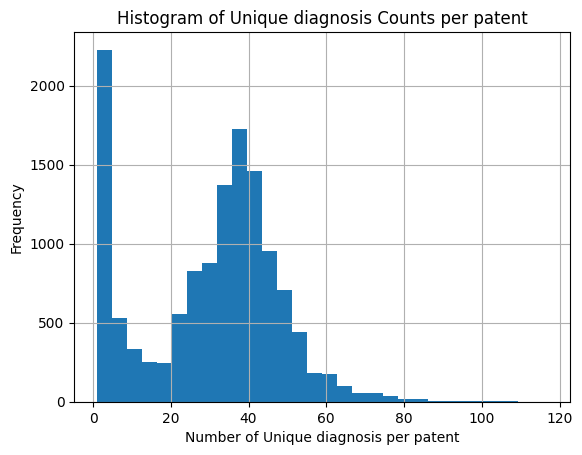

In [17]:
# Group by 'idcdha' count unique 'maicd'
_df2 = df.groupby('maql')['maxn'].nunique().reset_index(name='unique_maxn_count')
# Plot histogram
_df2['unique_maxn_count'].hist(bins=30)
plt.xlabel("Number of Unique diagnosis per patent")
plt.ylabel('Frequency')
plt.title("Histogram of Unique diagnosis Counts per patent")
plt.show()

**Ghi chú:**
- 1 bệnh nhân có thể tham gia nhiều xét nghiệm khác nhau.

Total unique maicd codes: 515


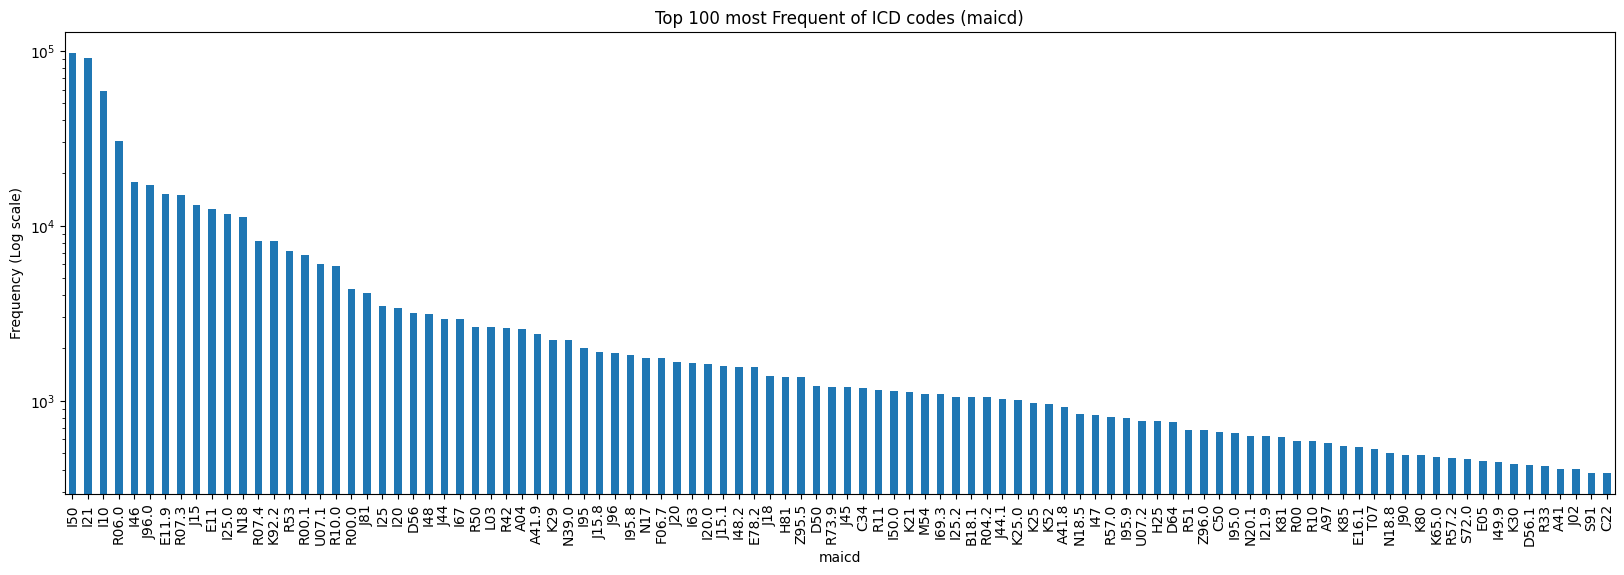

In [ ]:
# To plot the frequency of each 'maicd' with 'maicd' on the x-axis, use a bar plot instead of a histogram
plt.figure(figsize=(20, 6))
df['maicd'].value_counts().head(100).plot(kind='bar')
print("Total unique maicd codes:", df['maicd'].nunique())
plt.xlabel('maicd')
plt.xticks(rotation=90)
plt.ylabel('Frequency (Log scale)') 
plt.yscale('log')
plt.title('Top 100 most Frequent of ICD codes (maicd)')
plt.show()

In [28]:
maicd_df = df['maicd'].value_counts().reset_index(name='frequency')
for i in range(2, 5):
    print(f"Number of maicd with counts more than {10**i}:", len(maicd_df[maicd_df['frequency'] > 10**i]))

Number of maicd with counts more than 100: 243
Number of maicd with counts more than 1000: 62
Number of maicd with counts more than 10000: 12


In [36]:
import boto3

# Configure client (replace with your MinIO details)
s3_client = boto3.client(
    's3',
    endpoint_url='http://100.64.0.2:9000',  # e.g., 'http://localhost:9000'
    aws_access_key_id='nguyenanh',
    aws_secret_access_key='changeme'
)

# List buckets
buckets = s3_client.list_buckets()
print("Buckets:", [b['Name'] for b in buckets['Buckets']])

# List objects in a bucket (e.g., 'mybucket')
objects = s3_client.list_objects_v2(Bucket='timmach')
if 'Contents' in objects:
    for obj in objects['Contents']:
        print(f"Object: {obj['Key']}, Size: {obj['Size']} bytes")

Buckets: ['timmach']
Object: cdhaimage/200101085714070114_81209.jpg, Size: 160273 bytes
Object: cdhaimage/200101125317181806_81209.jpg, Size: 162784 bytes
Object: cdhaimage/200101130425601835_20.jpg, Size: 26038 bytes
Object: cdhaimage/200101154344722445_81209.jpg, Size: 160406 bytes
Object: cdhaimage/200101220855623419_81767.jpg, Size: 161576 bytes
Object: cdhaimage/200102151922214877_81155.jpg, Size: 36773 bytes
Object: cdhaimage/200103093230442616_81509.jpg, Size: 1720737 bytes
Object: cdhaimage/200103143437638919_81209.jpg, Size: 166578 bytes
Object: cdhaimage/200103172625931268_81209.jpg, Size: 159769 bytes
Object: cdhaimage/200103233107652058_20.jpg, Size: 21569 bytes
Object: cdhaimage/200104104444365769_20.jpg, Size: 37059 bytes
Object: cdhaimage/200106073646964552_81209.jpg, Size: 160260 bytes
Object: cdhaimage/200106075522195066_20.jpg, Size: 22019 bytes
Object: cdhaimage/200106082659636219_76427.jpg, Size: 29075 bytes
Object: cdhaimage/200106084525067139_81209.jpg, Size: 1621